Esercizio:
Utilizzando il dataset "Wine" disponibile in scikit-learn, sviluppa un modello di classificazione per prevedere la classe del vino basandoti sulle sue caratteristiche chimiche. Esegui una ricerca degli iperparametri utilizzando GridSearchCV e valuta le prestazioni del modello utilizzando la validazione incrociata.

Istruzioni:
Carica il dataset "Wine" utilizzando sklearn.datasets.load_wine().
Esplora i dati per comprendere le caratteristiche e le classi presenti.
Suddividi il dataset in set di training e test.
Crea un modello di classificazione utilizzando RandomForestClassifier.
Definisci una griglia di iperparametri, ad esempio variando il numero di stimatori (n_estimators), la profondità massima (max_depth) e il criterio di qualità dello split (criterion).
Utilizza GridSearchCV per trovare la migliore combinazione di iperparametri, utilizzando una validazione incrociata con 5 fold.
Dopo aver trovato i migliori iperparametri, addestra il modello ottimizzato sull'intero set di training.
Valuta le prestazioni del modello sul test set utilizzando metriche come l'accuratezza, la precisione, il richiamo e l'F1-score.
Visualizza la matrice di confusione per analizzare in dettaglio le prestazioni del modello.
Discuti i risultati e l'importanza delle diverse caratteristiche nel modello finale.


In [80]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


# Moduli di scikit-learn
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)

from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [81]:
## Carica il dataset "Wine" utilizzando sklearn.datasets.load_wine().

## from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data  # caratteristiche
y = wine.target  # target
feature_names = wine.feature_names
target_names = wine.target_names


## rubato da https://www.geeksforgeeks.org/wine-dataset/
# Load the wine dataset into a DataFrame
wine_data = load_wine(as_frame=True)
wine_df = pd.DataFrame(X, columns = feature_names)
wine_df['target'] = y

In [82]:
## Esplora i dati per comprendere le caratteristiche e le classi presenti.
wine_df.info()

# Display the shape of the DataFrame
print("Shape of the Wine DataFrame:", wine_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [83]:
# Visualizza il numero di campioni per ciascuna classe
class_counts = wine_df['target'].value_counts()
print("Numero di campioni per ciascuna classe:")
print(class_counts)

Numero di campioni per ciascuna classe:
target
1    71
0    59
2    48
Name: count, dtype: int64


In [84]:
# Calcola le statistiche di base delle feature
feature_stats = wine_df.describe()
print("\nStatistiche di base delle feature:")
print(feature_stats)


Statistiche di base delle feature:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453

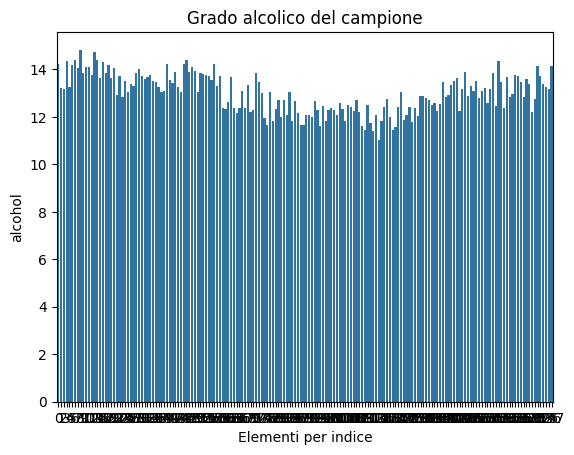

In [85]:
sns.barplot(x = wine_df.index, y = "alcohol", data = wine_df)
plt.title("Grado alcolico del campione")
plt.xlabel("Elementi per indice")
plt.show()

C:\Users\Rasty\AppData\Local\Temp\ipykernel_71204\123435405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "target", data = wine_df, palette = "Set2")


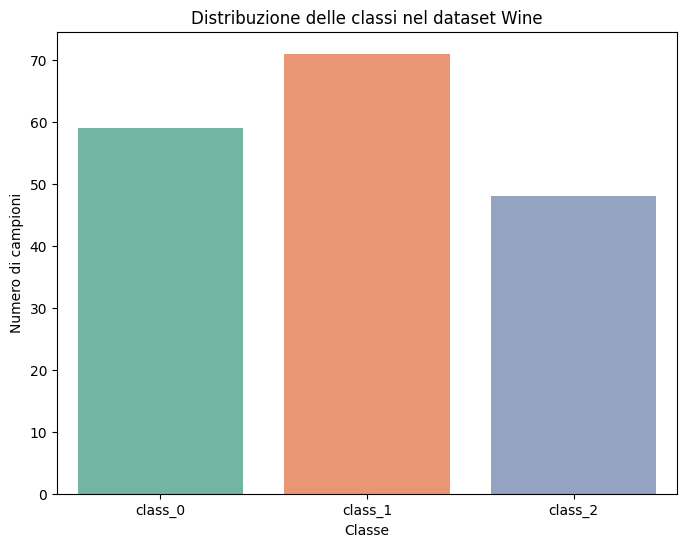

In [86]:
# Grafico a barre per mostrare la distribuzione delle classi
plt.figure(figsize = (8,6))
sns.countplot(x = "target", data = wine_df, palette = "Set2")
plt.title('Distribuzione delle classi nel dataset Wine')
plt.xlabel('Classe')
plt.ylabel('Numero di campioni')
plt.xticks(ticks = [0,1,2], labels = target_names)
plt.show()

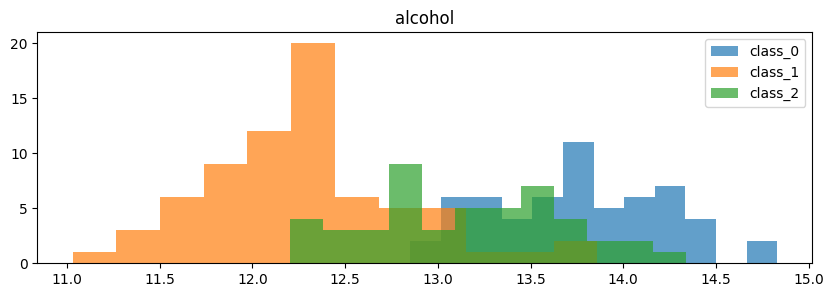

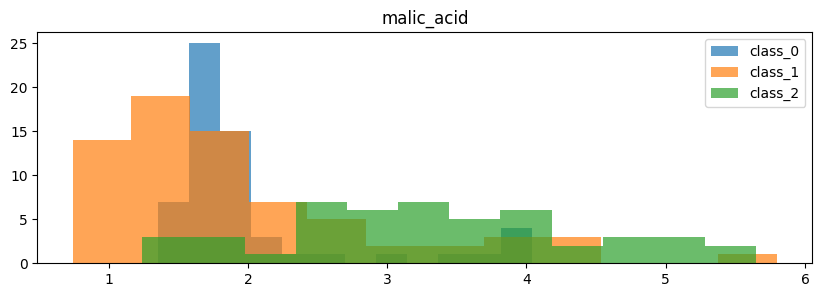

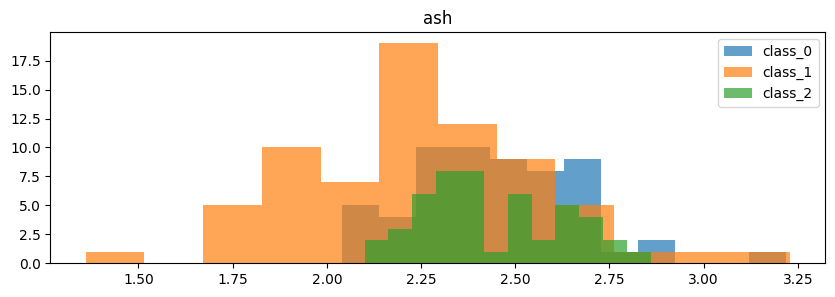

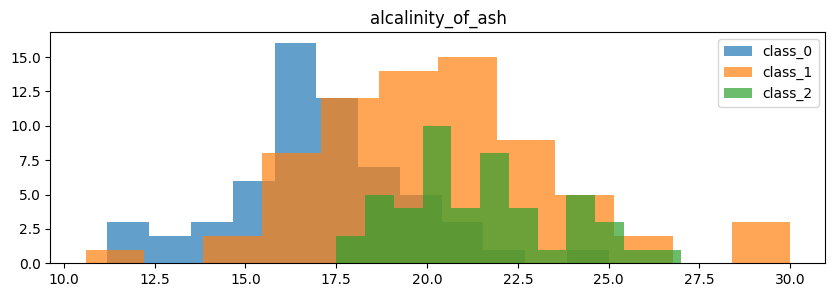

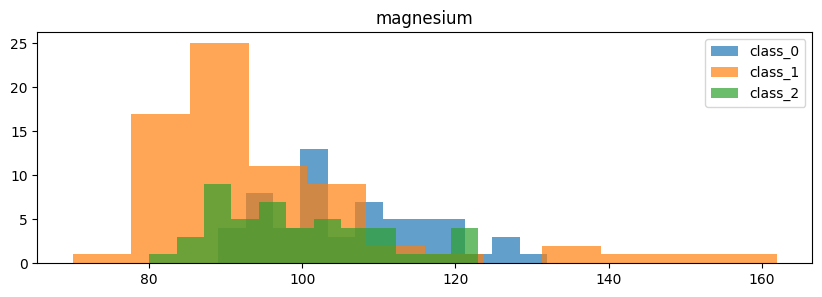

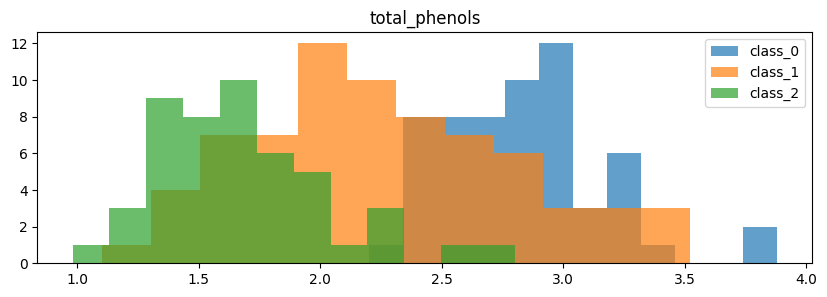

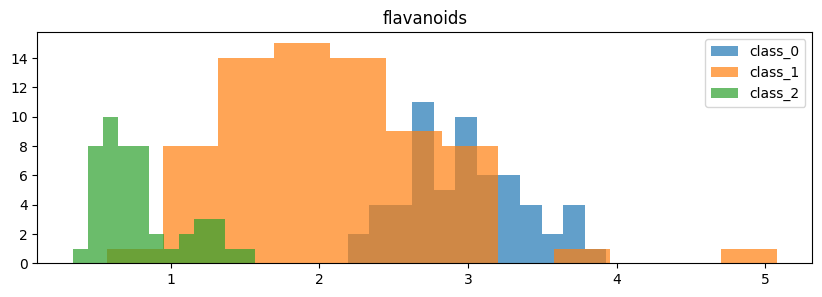

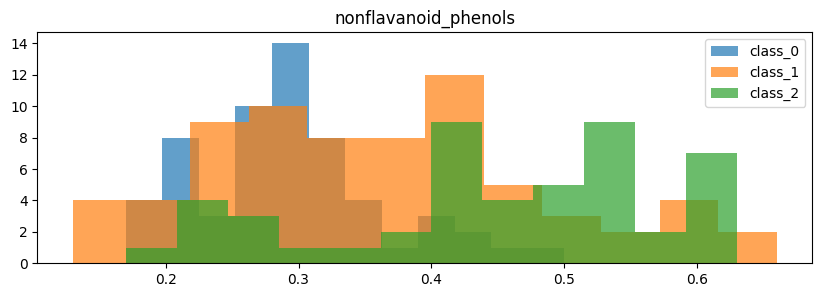

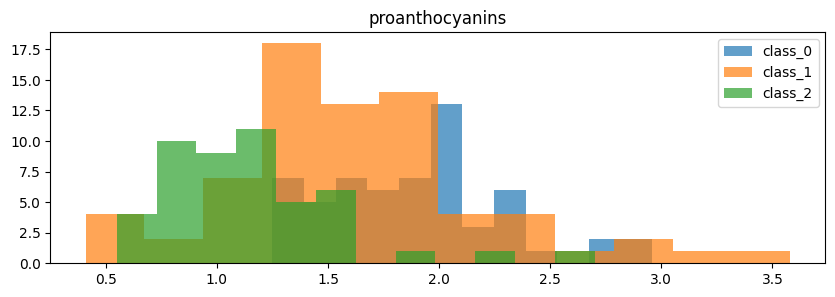

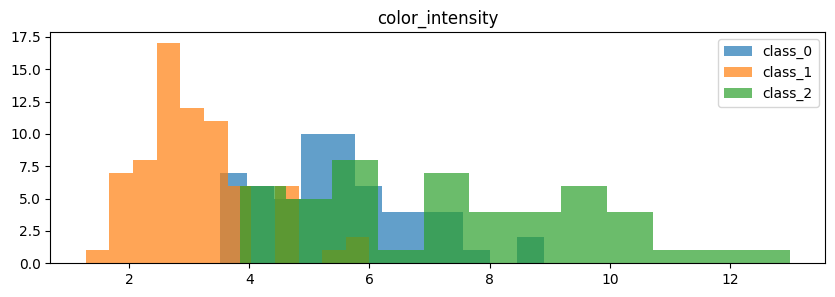

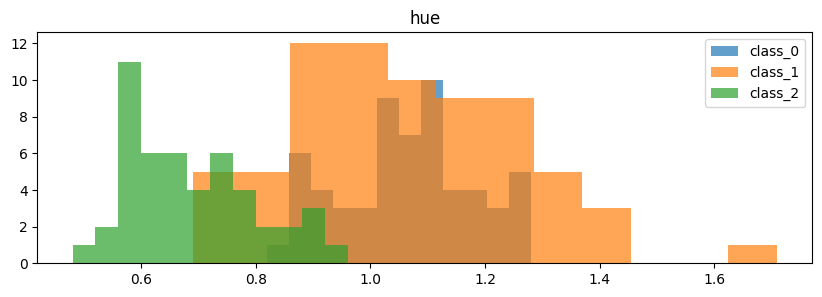

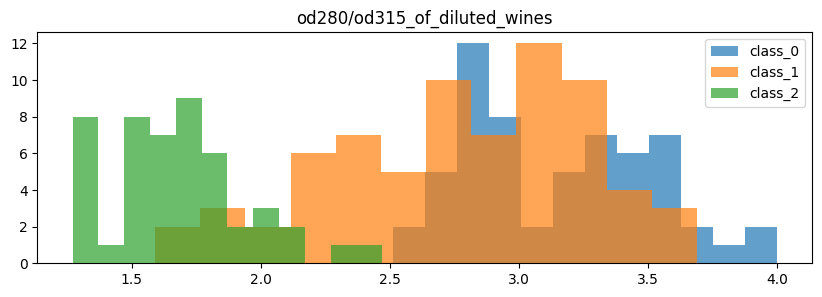

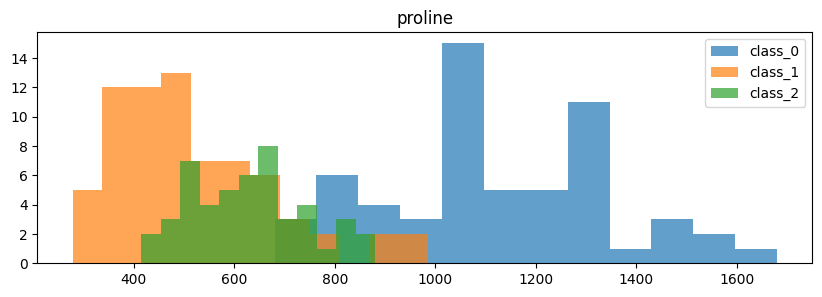

In [87]:


for f in feature_names:
    plt.figure(figsize=(10,3))
    for i in range(len(target_names)):
        plt.hist(wine_df[wine_df['target']==i][f], bins=12, label=target_names[i], alpha=0.7)
    plt.legend()
    plt.title(f)
    plt.show()

In [88]:
## Suddividi il dataset in set di training e test.
# Dividi i dati in 80% training e 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
##Crea un modello di classificazione utilizzando RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42) 

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
y_pred = model.predict(X_test)

In [91]:
## Definisci una griglia di iperparametri
# stimatori (n_estimators), la profondità massima (max_depth) e il criterio di qualità dello split (criterion).

lista = ["gini", "entropy", "log_loss"]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

parameters = {
    "n_estimators" : sp_randint(10, 150),
    "max_depth" : sp_randint(3, 7),
    "criterion" : lista
}

print(parameters)

clf = RandomizedSearchCV(model, param_distributions = parameters, cv = cv, random_state = 0)
search = clf.fit(X_train, y_train)
search.best_params_



{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000211086A3460>, 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000211452399D0>, 'criterion': ['gini', 'entropy', 'log_loss']}


{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 31}

In [92]:
model_best = search.best_estimator_
print(model_best)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=31,
                       random_state=42)


In [93]:
ypred =model_best.predict(X_test)
report = classification_report(y_test, y_pred, target_names = target_names)
print(report)

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



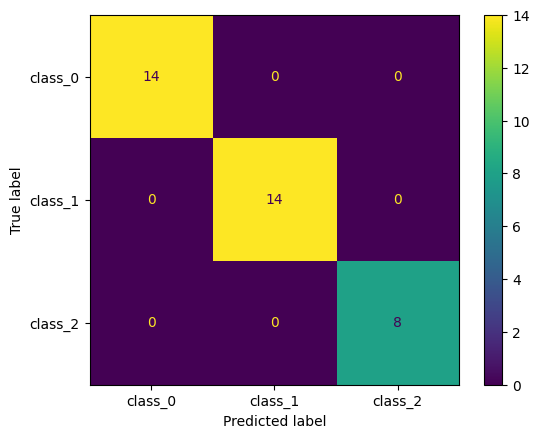

In [94]:
## Visualizza la matrice di confusione per analizzare in dettaglio le prestazioni del modello.
cm_new = confusion_matrix(y_test, y_pred)
cm_display_new = ConfusionMatrixDisplay(confusion_matrix = cm_new, display_labels = wine.target_names)
cm_display_new.plot()
plt.show()

Discuti i risultati e l'importanza delle diverse caratteristiche nel modello finale.
